*Logistic Regression Implementation*

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uplaoded= files.upload()

Saving insurance_data (1).csv to insurance_data (1).csv


In [3]:
df= pd.read_csv(list(uplaoded.keys())[0])

In [4]:
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


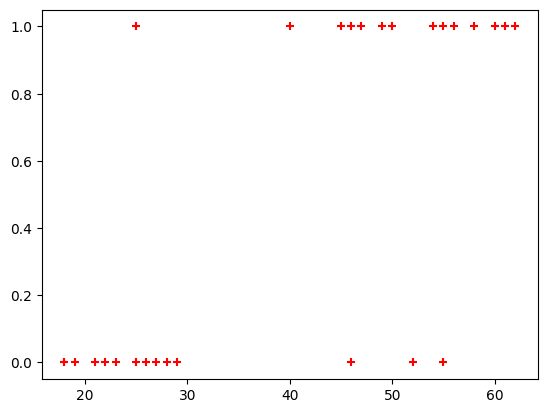

In [5]:
plt.scatter(df.age,df.bought_insurance, marker='+',color='red')

In [6]:
df.shape

(28, 3)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, train_size=0.8)

In [9]:
X_test

,age
23,45
16,25
13,29
7,60
15,55
20,21


In [10]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [11]:
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0])

In [13]:
model.score(X_test,y_test)

0.8333333333333334

In [14]:
y_test

,bought_insurance
23,1
16,1
13,0
7,1
15,1
20,0


In [15]:
model.predict_proba(X_test)

array([[0.45945483, 0.54054517],
       [0.94989706, 0.05010294],
       [0.91062675, 0.08937325],
       [0.0764812 , 0.9235188 ],
       [0.15252364, 0.84747636],
       [0.97243446, 0.02756554]])

In [16]:
model.coef_

array([[0.15524058]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(df[['age','affordibility']],df.bought_insurance,train_size=0.8)

In [19]:
X_train_scaled=X_train.copy()
X_train_scaled['age']= X_train_scaled['age']/100
X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100


In [20]:
from tensorflow import keras


In [21]:
model = keras.Sequential([
    keras.layers.Dense(
        1,
        input_shape=(2,),
        activation='sigmoid',
        kernel_initializer='ones',
        bias_initializer='zeros'
    )
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7727 - loss: 0.5265
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7727 - loss: 0.5265
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7727 - loss: 0.5264
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7727 - loss: 0.5264
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7727 - loss: 0.5263
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7727 - loss: 0.5263
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7727 - loss: 0.5262
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7727 - loss: 0.5262
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7727 - loss: 0.5261
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7727 - loss: 0.5261
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7727 - loss: 0.5260
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7727 - 

In [25]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.5000 - loss: 0.7050


[0.7049629092216492, 0.5]

In [26]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[0.400003  ],
       [0.6525851 ],
       [0.63276535],
       [0.72432876],
       [0.4706065 ],
       [0.5041212 ]], dtype=float32)

**#HR dataset**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [28]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [29]:
df1 = pd.read_csv(list(uploaded.keys())[0])
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<ipython-input-30-e34788bb0b8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df1, palette='viridis')


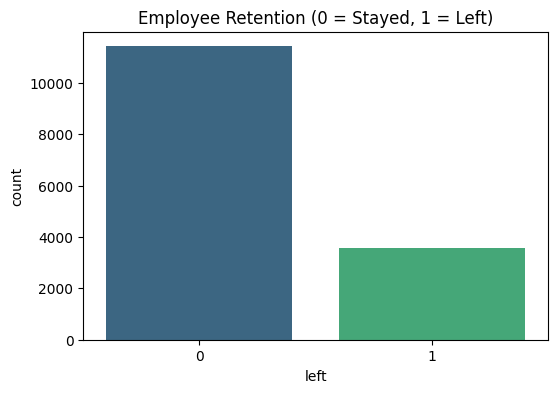

In [30]:

plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df1, palette='viridis')
plt.title('Employee Retention (0 = Stayed, 1 = Left)')
plt.show()


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

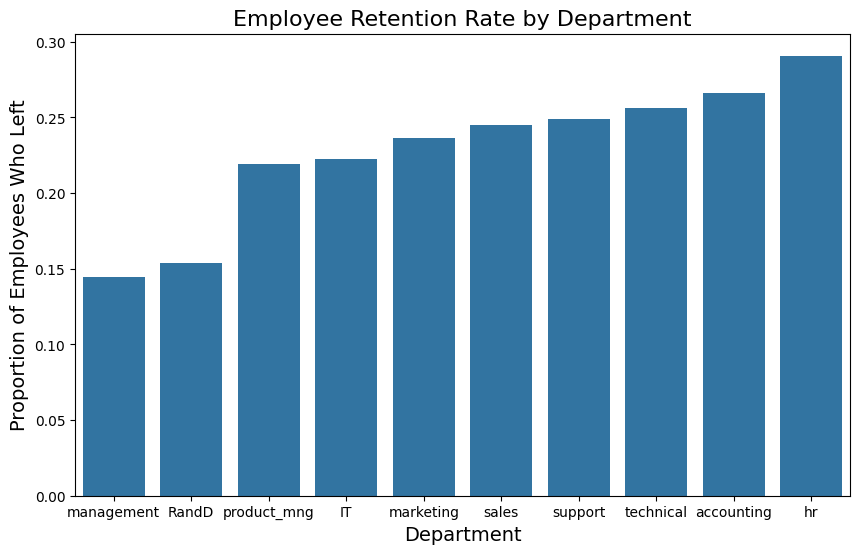

In [32]:

department_retention = df1.groupby('Department')['left'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=department_retention.index, y=department_retention.values)

plt.title('Employee Retention Rate by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Proportion of Employees Who Left', fontsize=14)

plt.show()


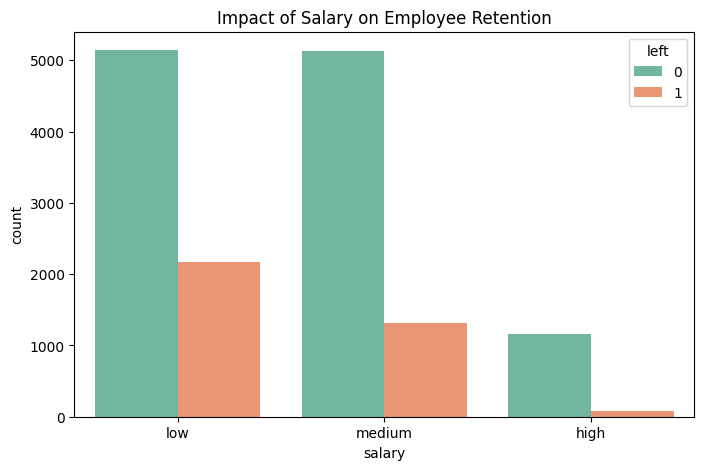

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='salary', hue='left', data=df1, palette='Set2')
plt.title('Impact of Salary on Employee Retention')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(df1[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']],df1.left,train_size=0.8)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and measure accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.2f}')

Logistic Regression Model Accuracy: 0.76


In [37]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
model.score(X_test,y_test)

0.7626666666666667

In [41]:
y_predicted = model.predict(X_test)

In [42]:
y_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [43]:
y_test

,left
7264,0
10500,0
6123,0
14232,1
9418,0
...,...
3917,0
11854,0
5827,0
112,1


In [44]:
model.predict_proba(X_test)

array([[0.53822108, 0.46177892],
       [0.73563319, 0.26436681],
       [0.90195264, 0.09804736],
       ...,
       [0.85568481, 0.14431519],
       [0.62621202, 0.37378798],
       [0.40803846, 0.59196154]])

In [45]:
model.coef_

array([[-3.98101231, -0.27553581,  0.00490178,  0.2059184 ]])

In [46]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:',accuracy)

Model Accuracy: 0.7626666666666667
